In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
plt.style.use('seaborn')
sns.set()
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

import xgboost as xgb
import joblib
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import shap

In [2]:
data = pd.read_csv('../../4_PFmodel/data/PFdata4ML.csv')

X = data.iloc[:,data.columns != "pf_log"]
ypf = data.iloc[:,data.columns == "pf_log"]

cols = ['T', 
        'Density', 
        'Av.enallen', 
        'Av.vdwrad', 
        'Su.unf', 
        'Va.boilp', 
        'Va.hhip', 
        'Va.unf', 
        'Va.punf', 
        'Va.sunf',
        'Va.sval',
        'Ma.hhip',
        'Ma.unf',
        'Ma.punf',
        'Ma.sunf',
        'Mi.elecaff',
        'Mi.lattc',
        'Mi.sval',
        'DC1',
        'PC2',
        'SC4']

scaler.fit(X)
X_scaler = scaler.transform(X)
X_scaler_pd = pd.DataFrame(X_scaler)
X_scaler_pd.columns = cols

model = joblib.load(r'../../4_PFmodel/1_RF/RF.model')

In [3]:
# Setting the header color and tail color
start_color = '#007EF7'
end_color = '#FD005A'
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_cmap', [start_color, end_color])

In [4]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_scaler_pd)
print(shap_values.shape)

(365, 21)


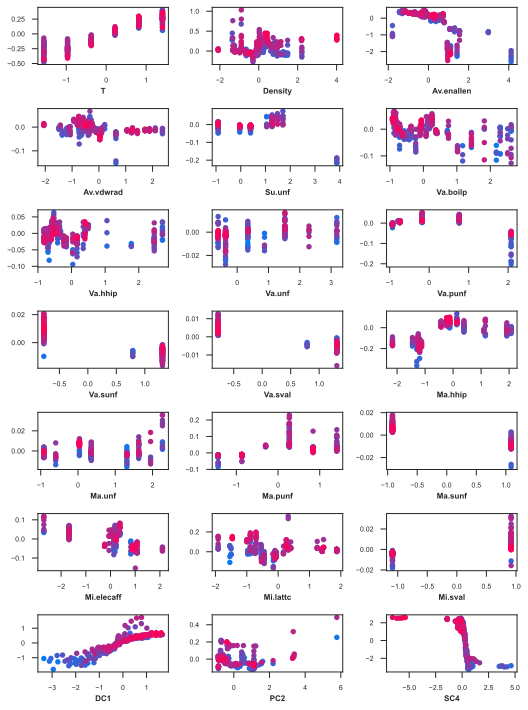

In [6]:
fig, axes = plt.subplots(7, 3, sharey=False, figsize=(7.5, 10))
sns.set_style('ticks')

for row in range(7):
    for col in range(3):
        index = row * 3 + col 
        des = cols[index]
        
        ax = axes[row, col]
        
        fig1 = sns.scatterplot(        
            x = X_scaler_pd[des],
            y = shap_values[:,index],
            c = np.array(ypf),
            cmap=cmap,
            alpha=1,
            linewidth = 0,
            s = 30,
            ax = ax
            )
            
        ax.tick_params(axis='x', labelsize=7, width=1,)
        ax.tick_params(axis='y', labelsize=7, width=1,)
        ax.set_xlabel(des, fontsize=8, fontweight='bold')

    
        ax.spines['bottom'].set_linewidth(1)   
        ax.spines['left'].set_linewidth(1)
        ax.spines['top'].set_linewidth(1)
        ax.spines['right'].set_linewidth(1)

plt.tight_layout()
plt.show()